# EDA of retail transaction dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
data= '../data/dataset01_sfu_hierarchical_forecast_project.csv'
df = pd.read_csv(data,)# index_col='Unnamed: 0')


In [3]:
df

Unnamed: 0  year  month  week   province    city    store   category  \
0                 0  2012      1     1  province3  city31  store40  category1   
1                 1  2012      1     1  province2  city15  store33  category1   
2                 3  2012      1     1  province1  city18  store51  category1   
3                 4  2012      1     1  province3  city31  store62  category1   
4                 5  2012      1     1  province3  city31  store40  category1   
...             ...   ...    ...   ...        ...     ...      ...        ...   
2348925     2639097  2018      1     1  province2  city12  store31  category2   
2348926     2639098  2018      1     1  province1  city39  store43  category2   
2348927     2639099  2018      1     1  province1  city23  store56  category2   
2348928     2639100  2018      1     1  province1  city35  store45  category2   
2348929     2639101  2018      1     1  province2  city44  store18  category2   

           department    class    vendor    size  totalQuantity  totalSales  
0         department1   class7   vendor2  size26            1.0  424.971081  
1         department1   class7   vendor2  size29           -1.0 -424.971081  
2         department1   class7   vendor2  size29            1.0  424.971081  
3         department1   class7   vendor2  size29            1.0  424.971081  
4         department1   class7   vendor2  size33            1.0  424.971081  
...               ...      ...       ...     ...            ...         ...  
2348925  department12  class41  vendor11   size1            2.0   85.708453  
2348926  department12  class41  vendor11   size1            2.0   85.708453  
2348927  department12  class41  vendor11   size1            1.0   42.854227  
2348928  department12  class41  vendor84   size1            1.0  103.564381  
2348929  department14  class44  vendor33   size1            5.0   10.713557  

[2348930 rows x 14 columns]

In [4]:
df['time'] = df['year'].astype(str) + " " + df['week'].astype(str) + " 0"
df['time'] = pd.to_datetime(df['time'], format="%Y %W %w")
df = df.set_index(df['time'])
df = df.drop(columns='time')
df

Unnamed: 0  year  month  week   province    city    store  \
time                                                                    
2012-01-08           0  2012      1     1  province3  city31  store40   
2012-01-08           1  2012      1     1  province2  city15  store33   
2012-01-08           3  2012      1     1  province1  city18  store51   
2012-01-08           4  2012      1     1  province3  city31  store62   
2012-01-08           5  2012      1     1  province3  city31  store40   
...                ...   ...    ...   ...        ...     ...      ...   
2018-01-07     2639097  2018      1     1  province2  city12  store31   
2018-01-07     2639098  2018      1     1  province1  city39  store43   
2018-01-07     2639099  2018      1     1  province1  city23  store56   
2018-01-07     2639100  2018      1     1  province1  city35  store45   
2018-01-07     2639101  2018      1     1  province2  city44  store18   

             category    department    class    vendor    size  totalQuantity  \
time                                                                            
2012-01-08  category1   department1   class7   vendor2  size26            1.0   
2012-01-08  category1   department1   class7   vendor2  size29           -1.0   
2012-01-08  category1   department1   class7   vendor2  size29            1.0   
2012-01-08  category1   department1   class7   vendor2  size29            1.0   
2012-01-08  category1   department1   class7   vendor2  size33            1.0   
...               ...           ...      ...       ...     ...            ...   
2018-01-07  category2  department12  class41  vendor11   size1            2.0   
2018-01-07  category2  department12  class41  vendor11   size1            2.0   
2018-01-07  category2  department12  class41  vendor11   size1            1.0   
2018-01-07  category2  department12  class41  vendor84   size1            1.0   
2018-01-07  category2  department14  class44  vendor33   size1            5.0   

            totalSales  
time                    
2012-01-08  424.971081  
2012-01-08 -424.971081  
2012-01-08  424.971081  
2012-01-08  424.971081  
2012-01-08  424.971081  
...                ...  
2018-01-07   85.708453  
2018-01-07   85.708453  
2018-01-07   42.854227  
2018-01-07  103.564381  
2018-01-07   10.713557  

[2348930 rows x 14 columns]

In [5]:
# Necessary package for determining whether a day falls on a Canadian Federal Holiday.
# !~/anaconda3/bin/conda install workalendar

In [6]:
# !~/anaconda3/bin/conda list
# !which python

In [7]:
# Create label for whether transaction occurred on a holiday week.

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from workalendar.america import Canada

minyear = df.index.min().year
maxyear = df.index.max().year

dr = pd.date_range(start=str(minyear), end=str(maxyear))

# USFederal Holidays as per calendar
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
holidays_week = holidays.year.astype(str) + " " + holidays.week.astype(str) + " 0"
holidays_week = pd.to_datetime(holidays_week, format="%Y %W %w")
# print(holidays_week)

df['Holiday'] = df.index.isin(holidays_week) # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

# Canadian federal holidays as per `workalender` package
canada = Canada()

# Retrieve holidays for relevant years
can_holiday = []
[can_holiday.extend(canada.holidays(y)) for y in range(minyear, maxyear) ]

can_holiday = np.array(can_holiday)
can_holiday = pd.DataFrame(can_holiday, columns=['Date', 'event'])
# print(can_holiday)

# Convert holidays to Datetime object
can_holiday['Date'] = pd.to_datetime(can_holiday['Date'].astype(str), format="%Y-%M-%d")

# Represent Datetime in (year, week, end of week) format
can_holidays_week = can_holiday.Date.dt.year.astype(str) + " " + can_holiday.Date.dt.week.astype(str) + " 0"
can_holidays_week = pd.to_datetime(can_holidays_week, format="%Y %W %w")

df['Holiday'] = df.index.isin(can_holidays_week) | df['Holiday'] # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

Unnamed: 0  year  month  week   province    city    store  \
time                                                                    
2012-01-08           0  2012      1     1  province3  city31  store40   
2012-01-08           1  2012      1     1  province2  city15  store33   
2012-01-08           3  2012      1     1  province1  city18  store51   
2012-01-08           4  2012      1     1  province3  city31  store62   
2012-01-08           5  2012      1     1  province3  city31  store40   
...                ...   ...    ...   ...        ...     ...      ...   
2018-01-07     2639097  2018      1     1  province2  city12  store31   
2018-01-07     2639098  2018      1     1  province1  city39  store43   
2018-01-07     2639099  2018      1     1  province1  city23  store56   
2018-01-07     2639100  2018      1     1  province1  city35  store45   
2018-01-07     2639101  2018      1     1  province2  city44  store18   

             category    department    class    vendor    size  totalQuantity  \
time                                                                            
2012-01-08  category1   department1   class7   vendor2  size26            1.0   
2012-01-08  category1   department1   class7   vendor2  size29           -1.0   
2012-01-08  category1   department1   class7   vendor2  size29            1.0   
2012-01-08  category1   department1   class7   vendor2  size29            1.0   
2012-01-08  category1   department1   class7   vendor2  size33            1.0   
...               ...           ...      ...       ...     ...            ...   
2018-01-07  category2  department12  class41  vendor11   size1            2.0   
2018-01-07  category2  department12  class41  vendor11   size1            2.0   
2018-01-07  category2  department12  class41  vendor11   size1            1.0   
2018-01-07  category2  department12  class41  vendor84   size1            1.0   
2018-01-07  category2  department14  class44  vendor33   size1            5.0   

            totalSales  Holiday  
time                             
2012-01-08  424.971081     True  
2012-01-08 -424.971081     True  
2012-01-08  424.971081     True  
2012-01-08  424.971081     True  
2012-01-08  424.971081     True  
...                ...      ...  
2018-01-07   85.708453     True  
2018-01-07   85.708453     True  
2018-01-07   42.854227     True  
2018-01-07  103.564381     True  
2018-01-07   10.713557     True  

[2348930 rows x 15 columns]

In [8]:
df.to_csv('../data/dataset-02.csv')

     year  week    totalSales
0    2012     1  1.538880e+06
1    2012     2  2.752834e+06
2    2012     3  2.848950e+06
3    2012     4  2.283498e+06
4    2012     5  2.405334e+06
..    ...   ...           ...
308  2017    49  2.739610e+06
309  2017    50  2.646425e+06
310  2017    51  3.107577e+06
311  2017    52  2.937096e+06
312  2018     1  1.012332e+06

[313 rows x 3 columns]


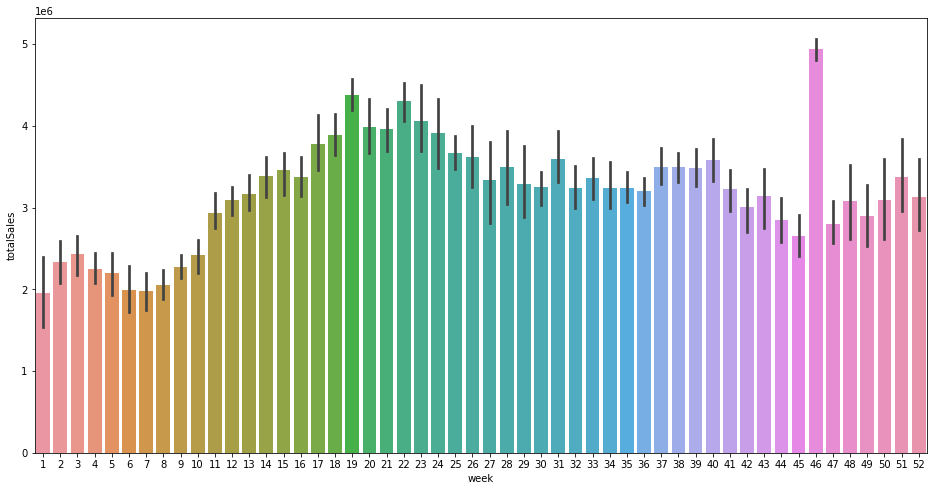

In [9]:
yw = df.groupby(['year','week']).agg({'totalSales':'sum'})
yw = yw.reset_index()
print(yw)

# plt.bar(x='week', height='totalSales', data=yw);
# sns.barplot(x='week', y='totalSales', data = yw);
sns.barplot(x='week', y='totalSales', data = yw);